In [7]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Immporting the dataset
dataset = pd.read_csv('Foreign_Exchange_Rates1.csv')
df = dataset.copy()

In [9]:

df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [10]:
# Columns of the dataset
print(df.columns)

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')


In [11]:
# Removing the unnusual column name 'Unnamed:0' from the dataset
#df = df.drop(columns=df.columns[0])
#df.head()

In [12]:
# Standardizing the existing column names to "CountryCurrency/USD"
new_col_names = ['Time Series', 'aud', 'eur', 'nzd', 'gbp', 'brl', 'cnd', 'cny', 'hkd', 'idr', 'krw', 'mxn', 'zar', 'sgd',
                 'dkk', 'jpy', 'myr', 'nok', 'sek', 'lkr', 'chf', 'twd', 'thb']

df.columns = new_col_names

# capitalizing the column names and appending '_USD' to each and every column except the first one
df.columns = map(str.upper, df.columns)
df.rename(columns = lambda x : x + '_USD', inplace=True)
df.rename(columns = {'TIME SERIES_USD' : 'Time Series'}, inplace=True)

In [13]:
df.head()

,Time Series,AUD_USD,EUR_USD,NZD_USD,GBP_USD,BRL_USD,CND_USD,CNY_USD,HKD_USD,IDR_USD,...,SGD_USD,DKK_USD,JPY_USD,MYR_USD,NOK_USD,SEK_USD,LKR_USD,CHF_USD,TWD_USD,THB_USD
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [14]:
# Replacing the 'ND' values with 'NaN'
df.replace(to_replace='ND', value=np.nan)

# Dropping all the NaN values at one go
df.dropna().reset_index(drop=True)

#Checking are there any NaN values are present or not
df.isna().sum()

Time Series    0
AUD_USD        0
EUR_USD        0
NZD_USD        0
GBP_USD        0
BRL_USD        0
CND_USD        0
CNY_USD        0
HKD_USD        0
IDR_USD        0
KRW_USD        0
MXN_USD        0
ZAR_USD        0
SGD_USD        0
DKK_USD        0
JPY_USD        0
MYR_USD        0
NOK_USD        0
SEK_USD        0
LKR_USD        0
CHF_USD        0
TWD_USD        0
THB_USD        0
dtype: int64

In [15]:
# data type of each column
df.dtypes

Time Series    object
AUD_USD        object
EUR_USD        object
NZD_USD        object
GBP_USD        object
BRL_USD        object
CND_USD        object
CNY_USD        object
HKD_USD        object
IDR_USD        object
KRW_USD        object
MXN_USD        object
ZAR_USD        object
SGD_USD        object
DKK_USD        object
JPY_USD        object
MYR_USD        object
NOK_USD        object
SEK_USD        object
LKR_USD        object
CHF_USD        object
TWD_USD        object
THB_USD        object
dtype: object

In [16]:
# converting the object data type to numeric type for each column
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce') # returns invalid value as NaN

In [17]:
# adding more 3 columns named as 'month', 'year', 'month_year'
df['Time Series'] = pd.to_datetime(df['Time Series'])
df['month'] = df['Time Series'].dt.month
df['year'] = df['Time Series'].dt.year
df['month_year'] = df['Time Series'].dt.to_period('M')

In [18]:
df.head()

,Time Series,AUD_USD,EUR_USD,NZD_USD,GBP_USD,BRL_USD,CND_USD,CNY_USD,HKD_USD,IDR_USD,...,MYR_USD,NOK_USD,SEK_USD,LKR_USD,CHF_USD,TWD_USD,THB_USD,month,year,month_year
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,1,2000,2000-01
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,1,2000,2000-01
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,1,2000,2000-01
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,1,2000,2000-01
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,1,2000,2000-01


In [19]:
df['AUD_USD'].count()

5019

In [20]:
df_groupby_aud = df.groupby('month_year').AUD_USD.mean().reset_index()
df_groupby_aud

,month_year,AUD_USD
0,2000-01,1.524645
1,2000-02,1.593205
2,2000-03,1.641087
3,2000-04,1.677935
4,2000-05,1.729309
...,...,...
235,2019-08,1.476127
236,2019-09,1.467460
237,2019-10,1.471114
238,2019-11,1.464763


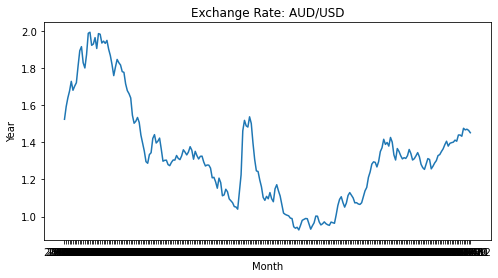

In [21]:
# to visualize the pattern of AUD/USD
x = df_groupby_aud['month_year'].astype(str)
y = df_groupby_aud['AUD_USD']

plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title("Exchange Rate: AUD/USD")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [22]:
# Creating a dataframe of average rate of each month of all the given countries
groupby_all = df.groupby('month_year').apply(lambda x : pd.Series
                                             ({'AUD_mean': x['AUD_USD'].mean(),
                                               'EUR_mean': x['EUR_USD'].mean(),
                                               'NZD_mean': x['NZD_USD'].mean(),
                                               'SGD_mean': x['SGD_USD'].mean(),
                                               'GBP_mean': x['GBP_USD'].mean(),
                                               'JPY_mean': x['JPY_USD'].mean(),
                                               'CHF_mean': x['CHF_USD'].mean()})).reset_index()

groupby_all = pd.DataFrame(groupby_all)

groupby_all['USD_mean'] = [1 for i in range(240)]
groupby_all.head()

,month_year,AUD_mean,EUR_mean,NZD_mean,SGD_mean,GBP_mean,JPY_mean,CHF_mean,USD_mean
0,2000-01,1.524645,0.987345,1.951050,1.675665,0.609620,105.296000,1.590260,1
1,2000-02,1.593205,1.017025,2.039655,1.702790,0.625020,109.388500,1.634770,1
2,2000-03,1.641087,1.037013,2.040430,1.715343,0.632948,106.307391,1.663617,1
3,2000-04,1.677935,1.058630,2.016400,1.709590,0.631990,105.627000,1.665650,1
4,2000-05,1.729309,1.104023,2.125468,1.728573,0.662927,108.320455,1.719009,1


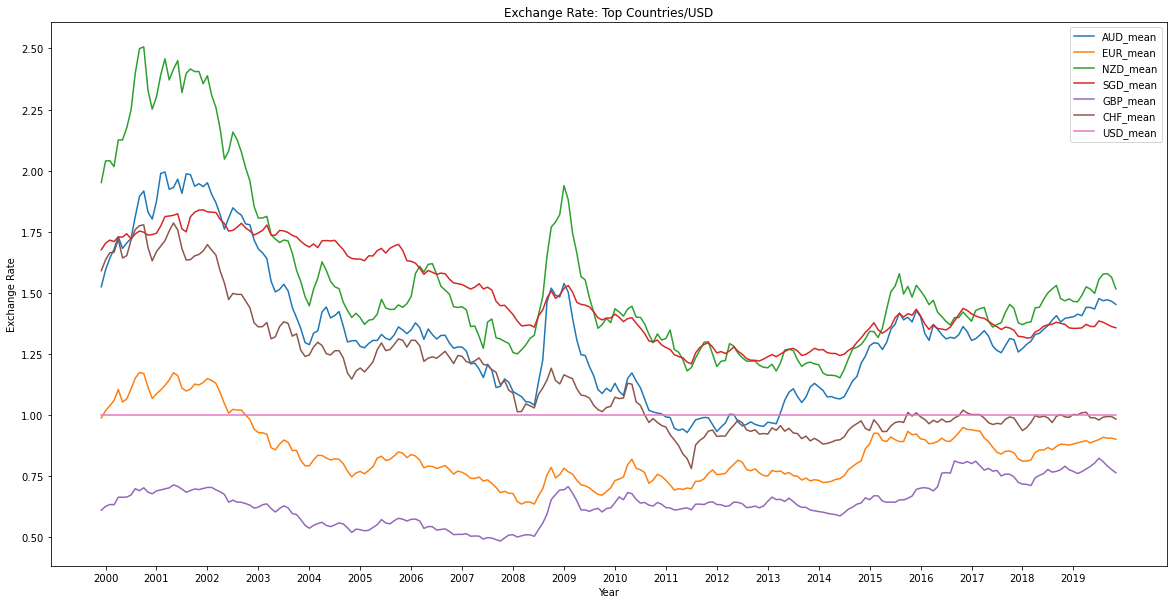

In [23]:
# to visualize all the countries pattern
y_all = groupby_all[['AUD_mean', 'EUR_mean', 'NZD_mean', 'SGD_mean', 'GBP_mean', 'CHF_mean', 'USD_mean']]
labels = ["AUD_mean", "EUR_mean", "NZD_mean", "SGD_mean", "GBP_mean", "CHF_mean", "USD_mean"]

x_ticks = list(range(1, 240, 12))
x_ticklabels = [x for x in range(2000, 2020)]

plt.figure(figsize=(20,10))
ax = plt.subplot()

plt.plot(x, y_all)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

plt.legend(labels)
plt.title("Exchange Rate: Top Countries/USD")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.show()

In [24]:
# Importing the Interest Rate Differential
ir_df = pd.read_csv('InterestRate.csv')
ir_df.head()

,Date,Long Carry,Short Carry
0,01-01-2017,0.65%,-2.42%
1,02-01-2017,0.78%,-2.50%
2,03-01-2017,0.66%,-2.38%
3,04-01-2017,0.34%,-2.10%
4,05-01-2017,0.32%,-2.22%


In [25]:
# converting the date to 'YYYY-MM-DD' format
ir_df['Date'] = pd.to_datetime(ir_df['Date'])
ir_df.head()

,Date,Long Carry,Short Carry
0,2017-01-01,0.65%,-2.42%
1,2017-02-01,0.78%,-2.50%
2,2017-03-01,0.66%,-2.38%
3,2017-04-01,0.34%,-2.10%
4,2017-05-01,0.32%,-2.22%


In [26]:
# using Long Carry to tranasform the data for the analysis
# removing the percentage from the numbers and then converting them to float
# and reshaping 1D to 2D array
x_ir = ir_df['Long Carry'].astype(str)
x_ir = x_ir.replace({'%':''}, regex = True)
x_ir = x_ir.astype('float')
x_ir = np.array(x_ir).reshape(-1,1)
x_ir

array([[ 0.65],
       [ 0.78],
       [ 0.66],
       [ 0.34],
       [ 0.32],
       [ 0.27],
       [ 0.09],
       [-0.01],
       [-0.14],
       [-0.09],
       [-0.13],
       [-0.34],
       [-0.59],
       [-0.47],
       [-0.54],
       [-0.38],
       [-0.65],
       [-0.8 ],
       [-0.65],
       [-0.96],
       [-0.95],
       [-1.  ],
       [-1.25],
       [-1.35],
       [-1.39],
       [-1.42],
       [-1.83],
       [-1.79],
       [-1.69],
       [-1.95],
       [-1.99],
       [-2.23],
       [-2.23],
       [-2.15],
       [-2.11],
       [-2.12]])

In [27]:
# filtering the above years i.e from 2017-2019 from the original dataset
aud_usd_fx = df_groupby_aud[(df_groupby_aud['month_year'] >= '2017-01') & (df_groupby_aud['month_year'] <= '2019-12')].reset_index(drop=True)
aud_usd = aud_usd_fx['AUD_USD']
y_fx = aud_usd

In [28]:
y_fx.head()

0    1.339942
1    1.304800
2    1.311987
3    1.327435
4    1.344709
Name: AUD_USD, dtype: float64

In [29]:
# Linear Regression with 1 independent variable (interest rate)
# Year: 2017 - 2019

#x_ir = Inerest Rate
#y_fx = Exchange Rate

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_ir, y_fx, test_size=0.2, random_state=1)

model = LinearRegression()

#training the model with the training datset and predicting with x_test
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)

print()

# Accuracy of the training and testing dataset
print('R-squared of training data is: ', model.score(x_train, y_train))
print('R-squared of testing data is: ', model.score(x_test, y_test))

[1.42759002 1.43493561 1.40922605 1.28496315 1.36454037 1.35474625
 1.3669889  1.38841354]

R-squared of training data is:  0.6947623687482268
R-squared of testing data is:  0.6776295453826162


In [30]:
# Linear Regression model without splitting the dataset
model = LinearRegression()
model.fit(x_ir, y_fx)

# predicting the exchange rate(y) with the help of interest rate(x)
y_fx_predict = model.predict(x_ir)
print(y_fx_predict)

print()

# Accuracy
print('R-squared of the entire dataset is: ',model.score(x_ir, y_fx))

[1.26817503 1.26008162 1.26755246 1.28747469 1.28871983 1.29183268
 1.30303893 1.30926463 1.31735804 1.31424519 1.31673547 1.32980943
 1.34537367 1.33790284 1.34226082 1.33229971 1.34910909 1.35844763
 1.34910909 1.36840875 1.36778618 1.37089903 1.38646327 1.39268897
 1.39517925 1.39704696 1.42257231 1.42008203 1.41385634 1.43004315
 1.43253343 1.4474751  1.4474751  1.44249454 1.44000426 1.44062683]

R-squared of the entire dataset is:  0.720032833933373


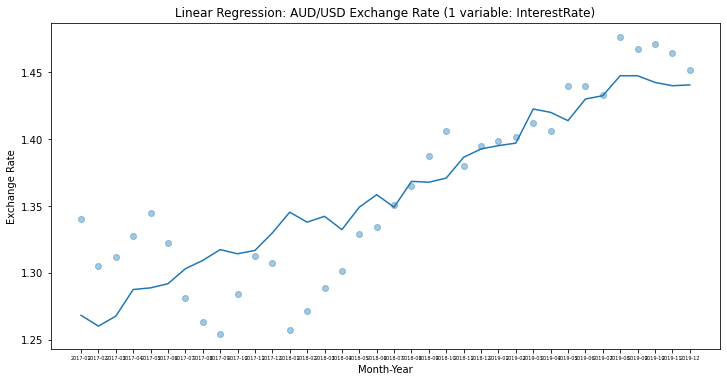

In [31]:
# Visualizing the Linear Regression of Exchange rate and interest rate
month_year = aud_usd_fx['month_year'].astype(str)

plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict)
plt.title("Linear Regression: AUD/USD Exchange Rate (1 variable: InterestRate)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()

In [32]:
# Importing the dataset of gdp_difference of Australia and USA
aus_usa_gdp_diff = pd.read_csv('GDP_diff.csv')
aus_usa_gdp2017_2019 = aus_usa_gdp_diff.copy()

In [33]:
aus_usa_gdp2017_2019.head()

,Month-Year,Data
0,2017-01,0.1460
1,2017-02,0.1432
2,2017-03,0.1497
3,2017-04,0.1692
4,2017-05,0.2010


In [34]:
# columns of the dataset
aus_usa_gdp2017_2019.columns

Index(['Month-Year', 'Data'], dtype='object')

In [35]:
# renaming the column names
aus_usa_gdp2017_2019 = aus_usa_gdp2017_2019.rename(columns={'Month-Year':'month_year'})
aus_usa_gdp2017_2019 = aus_usa_gdp2017_2019.rename(columns={'Data':'GDP_diff'})

In [36]:
aus_usa_gdp2017_2019.head()

,month_year,GDP_diff
0,2017-01,0.1460
1,2017-02,0.1432
2,2017-03,0.1497
3,2017-04,0.1692
4,2017-05,0.2010


In [37]:
# extracting the gdp_diff separately
gdp_diff = ["%.4f" %num for num in aus_usa_gdp2017_2019['GDP_diff']]
gdp_diff

['0.1460',
 '0.1432',
 '0.1497',
 '0.1692',
 '0.2010',
 '0.2395',
 '0.2747',
 '0.2969',
 '0.3030',
 '0.3025',
 '0.3085',
 '0.3293',
 '0.3588',
 '0.3842',
 '0.3919',
 '0.3747',
 '0.3297',
 '0.2583',
 '0.1686',
 '0.0701',
 '-0.0283',
 '-0.1212',
 '-0.2047',
 '-0.2754',
 '-0.3293',
 '-0.3629',
 '-0.3751',
 '-0.3705',
 '-0.3559',
 '-0.3377',
 '-0.3206',
 '-0.3075',
 '-0.3003',
 '-0.2996',
 '-0.3057',
 '-0.3182']

In [38]:
# Linear Regression with multiple independent variable (interest rate & GDP Rates)

# x_ir_gdp = [interest rate, GDP difference of Australia and USA]
# y_fx = Exchange Rate

x_ir_gdp = np.array(list(zip(x_ir, gdp_diff)))
x_ir_gdp = x_ir_gdp.astype(np.float)

model.fit(x_ir_gdp, y_fx)

# predicting the exchange rate w.r.t x_ir_gdp
y_fx_predict_2 = model.predict(x_ir_gdp)
print(y_fx_predict_2)

print()

# Accuracy of the model
print('R-squared Error: ', model.score(x_ir_gdp, y_fx))

[1.30832972 1.30599552 1.30752859 1.31127279 1.30665196 1.30160873
 1.29986808 1.29848125 1.30029156 1.2993022  1.29920467 1.30039129
 1.30105175 1.2944545  1.29472833 1.29403893 1.30695391 1.32149501
 1.33252889 1.3547921  1.37019956 1.38601637 1.40461582 1.41797706
 1.42738878 1.43336409 1.44406445 1.44247921 1.43802397 1.44069207
 1.43883239 1.44188264 1.44073963 1.43891853 1.43903194 1.44123008]

R-squared Error:  0.8720883850071524


<ipython-input-38-1a823b5dc250>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_ir_gdp = np.array(list(zip(x_ir, gdp_diff)))
<ipython-input-38-1a823b5dc250>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_ir_gdp = x_ir_gdp.astype(np.float)


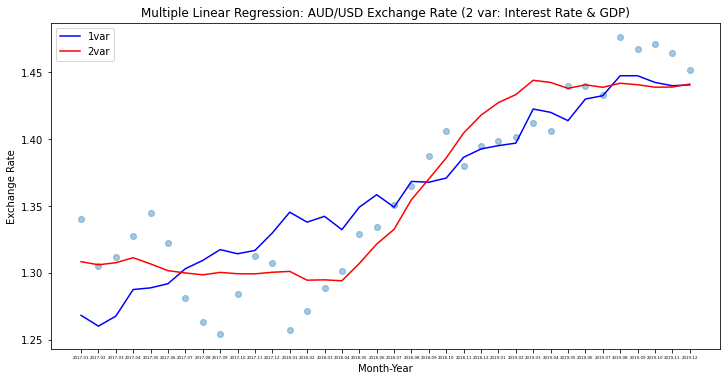

In [39]:
# Visualizing the Multiple Linear Regression of Exchange rate w.r.t interest rate and GDP rates
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b') # interest rate
plt.plot(month_year, y_fx_predict_2, color='r') # interest rate and GDP difference
plt.legend(['1var', '2var'])
plt.title("Multiple Linear Regression: AUD/USD Exchange Rate (2 var: Interest Rate & GDP)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()

In [40]:
# Importing the dataset of unemployment rate difference of Australia and USA
unemployment_rate = pd.read_csv('UER DATA.csv')
uer_df = unemployment_rate.copy()

In [41]:
uer_df.head()

,Month-Year,Data
0,2017-01,1.1049
1,2017-02,1.5569
2,2017-03,1.5852
3,2017-04,1.3909
4,2017-05,1.3773


In [42]:
# columns of the dataset
uer_df.columns

Index(['Month-Year', 'Data'], dtype='object')

In [43]:
# renaming the column names
uer_df = uer_df.rename(columns={'Month-Year':'month_year'})
uer_df = uer_df.rename(columns={'Data':'UER_diff'})

In [44]:
uer_df.head()

,month_year,UER_diff
0,2017-01,1.1049
1,2017-02,1.5569
2,2017-03,1.5852
3,2017-04,1.3909
4,2017-05,1.3773


In [45]:
# extracting the uenemployment rate difference
uer_diff_all = uer_df['UER_diff']

In [46]:
uer_diff = ["%.4f" % num for num in uer_diff_all]
uer_diff

['1.1049',
 '1.5569',
 '1.5852',
 '1.3909',
 '1.3773',
 '1.4156',
 '1.2700',
 '1.3390',
 '1.5011',
 '1.3424',
 '1.4384',
 '1.6143',
 '1.4627',
 '1.6988',
 '1.6145',
 '1.8452',
 '1.5477',
 '1.6628',
 '1.6205',
 '1.6746',
 '1.4033',
 '1.4193',
 '1.2982',
 '1.1261',
 '1.2693',
 '1.2660',
 '1.5775',
 '1.6893',
 '1.6890',
 '1.6503',
 '1.7533',
 '1.8396',
 '1.8146',
 '1.8720',
 '1.7240',
 '1.5248']

In [47]:
# Linear Regression with multiple independent variable (interest rate, GDP Rates & Unemployment Rates)

# x_ir_gdp_uer = [interest rate, GDP difference and unemployment rate difference of Australia and USA]
# y_fx = Exchange Rate

x_ir_gdp_uer = np.array(list(zip(x_ir, gdp_diff, uer_diff)))
x_ir_gdp_uer = x_ir_gdp_uer.astype(np.float)

model.fit(x_ir_gdp_uer, y_fx)

# predicting the exchange rate w.r.t to x_ir_gdp_uer
y_fx_predict_3 = model.predict(x_ir_gdp_uer)
print(y_fx_predict_3)

print()

# Accuracy of the model
print('R-squared error: ', model.score(x_ir_gdp_uer, y_fx))

[1.29968787 1.32378504 1.32525747 1.31398611 1.30755413 1.30301186
 1.29020524 1.29082406 1.29980318 1.29072335 1.29525475 1.30302309
 1.29159361 1.29873334 1.29334076 1.30767801 1.30219049 1.32309064
 1.33593521 1.35998795 1.3631849  1.38168585 1.39279783 1.39734783
 1.41553044 1.42183466 1.44500294 1.44991259 1.44626614 1.44320987
 1.44607534 1.45063089 1.44792988 1.45020224 1.44283691 1.43431186]

R-squared error:  0.8889382199971629


<ipython-input-47-9b722213fe43>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_ir_gdp_uer = np.array(list(zip(x_ir, gdp_diff, uer_diff)))
<ipython-input-47-9b722213fe43>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_ir_gdp_uer = x_ir_gdp_uer.astype(np.float)


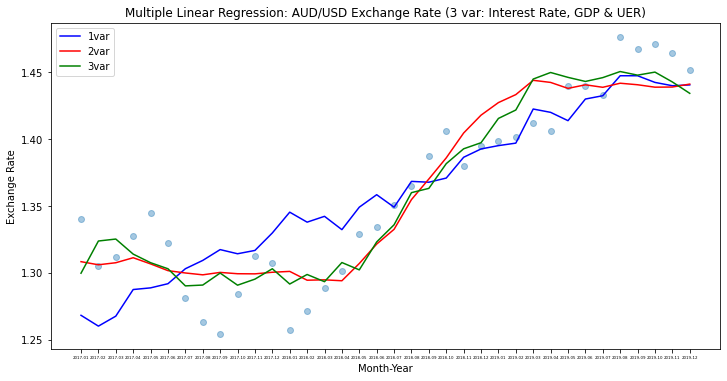

In [48]:
# Visualizing the Multiple Linear Regression of Exchange rate w.r.t interest rate, GDP rates and UER Rates
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b') # interest rates
plt.plot(month_year, y_fx_predict_2, color='r') # interest rate, GDP rate
plt.plot(month_year, y_fx_predict_3, color='g') # interest rate, GDP rate, UER rate
plt.legend(['1var', '2var', '3var'])
plt.title("Multiple Linear Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()


In [49]:
# Polynomial Regreesion for the latest model to find the best fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=4)

# converting the independent variables from linearly to polynomial
x_poly = poly.fit_transform(x_ir_gdp_uer)

poly_model = LinearRegression()
poly_model.fit(x_poly, y_fx)
y_pred = poly_model.predict(x_poly)
print(y_pred)

print()

# Accuracy of the model
print('R-squared error: ', poly_model.score(x_poly, y_fx))

[1.33993125 1.30490112 1.31184435 1.32743669 1.34443259 1.32282114
 1.28128314 1.26362848 1.25455332 1.28423715 1.31229091 1.30706143
 1.25717139 1.27144432 1.28835869 1.30173635 1.32926369 1.33420873
 1.35098362 1.36511874 1.38796449 1.40601087 1.3796432  1.3950603
 1.39979339 1.40040159 1.41319275 1.4061451  1.44006515 1.43727231
 1.43351126 1.47712708 1.46598816 1.47081494 1.4666605  1.45207095]

R-squared error:  0.9998889832100237


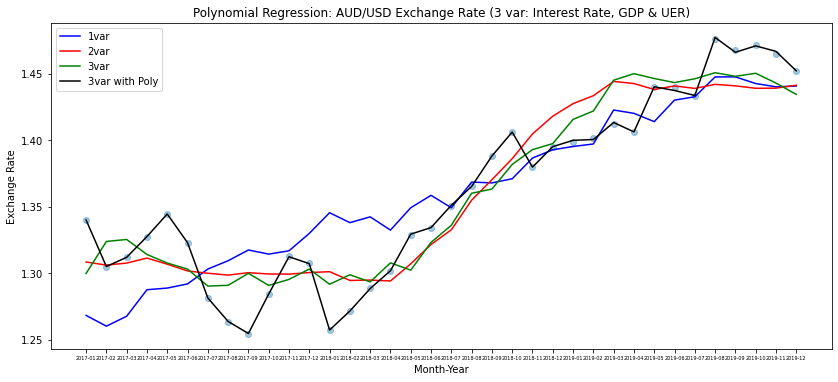

In [50]:
# Visualizing the Polynomial Regression 
plt.figure(figsize=(14,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b') # interest rates
plt.plot(month_year, y_fx_predict_2, color='r') # interest rate, GDP rate
plt.plot(month_year, y_fx_predict_3, color='g') # interest rate, GDP rate, UER rate
plt.plot(month_year, y_pred, color='black')  # Polynomial Regression graph
plt.legend(['1var', '2var', '3var', '3var with Poly'])
plt.title("Polynomial Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error

r_squared_list = []
mse_list = []

for i in range(1,10):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x_ir_gdp_uer)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly, y_fx)
    y_pred = model_poly.predict(x_poly)
    
    r_squared = model_poly.score(x_poly, y_fx)
    mse = mean_squared_error(y_pred, y_fx)
    
    r_squared_list.append(r_squared)
    mse_list.append(mse)

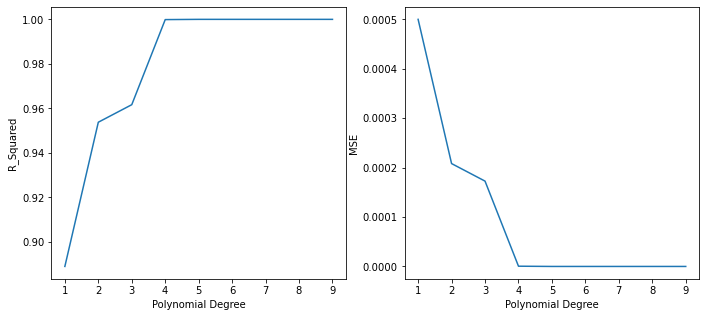

In [52]:
# Visulaizing the R-Squared and MSE plots
plt.figure(figsize=(10,5))

# Plotting of R-Squared Error
ax1 = plt.subplot(1,2,1)
plt.plot(range(1,10), r_squared_list)
plt.xlabel("Polynomial Degree")
plt.ylabel("R_Squared")

# Plotting of Mean Squared Error
ax2 = plt.subplot(1,2,2)
plt.plot(range(1,10), mse_list)
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")

plt.subplots_adjust(0.0005)

plt.show()

In [53]:
# Ridge and Lasso Regression
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=0.001)
ridge.fit(x_ir_gdp_uer, y_fx)

y_fx_ridge = ridge.predict(x_ir_gdp_uer)
print('Ridge Regression error: ', ridge.score(x_ir_gdp_uer, y_fx))

# Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(x_ir_gdp_uer, y_fx)

y_fx_lasso = lasso.predict(x_ir_gdp_uer)
print('Lasso Regression error: ', lasso.score(x_ir_gdp_uer, y_fx))

Ridge Regression error:  0.8889378781766654
Lasso Regression error:  0.8703105846376482


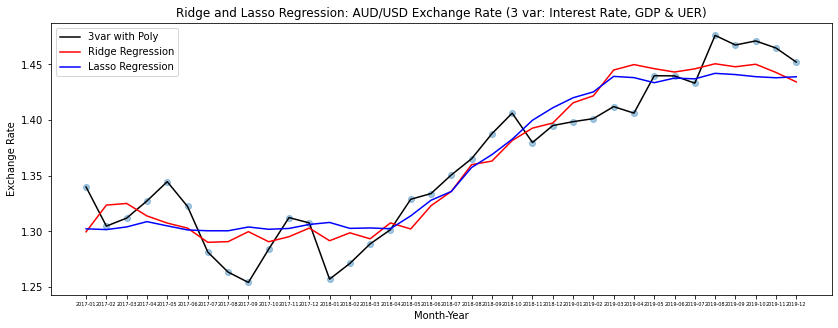

In [54]:
# Visualizing Ridge and Lasso Regression
plt.figure(figsize=(14,5))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_pred, color='black')
plt.plot(month_year, y_fx_ridge, color='r')
plt.plot(month_year, y_fx_lasso, color='b')
plt.legend(['3var with Poly', 'Ridge Regression', 'Lasso Regression'])
plt.title("Ridge and Lasso Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()

In [55]:
# H0: Dataset is not stationary
# H1: Dataset is stationary

from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(y_pred)
print('stat=%.3f, p = %.3f' %adf_test[0:2])
if (adf_test[1] > 0.05) :
    print("Probably Not Stationary")
else:
    print("Probably Stationary")

stat=-0.434, p = 0.904
Probably Not Stationary


In [56]:
# H0: Dataset is stationary
# H1: Dataset is not stationary

from statsmodels.tsa.stattools import kpss

kpss_test = kpss(y_pred, nlags='auto')
print('stat=%.3f, p = %.3f' %kpss_test[0:2])
if (kpss_test[1] > 0.05) :
    print("Probably Stationary")
else:
    print("Probably Not Stationary")

stat=0.692, p = 0.014
Probably Not Stationary


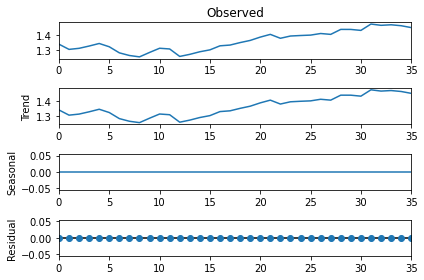

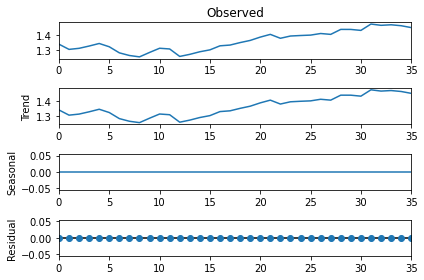

In [57]:
# Stationary Testing using Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

y_pred_list = y_pred.tolist()
result = seasonal_decompose(y_pred_list, model='additive', period=1)

result.plot()

In [58]:
# Replacing the actual date with the range of numbers from 1-36 for the sake of simplicity
# 36 is the number of months
date = list(range(1,37))
date_fx = pd.DataFrame(zip(date, y_pred_list), columns=['Date','FX'])
date_fx

,Date,FX
0,1,1.339942
1,2,1.304800
2,3,1.311987
3,4,1.327435
4,5,1.344709
5,6,1.322464
6,7,1.281435
7,8,1.263496
8,9,1.254210
9,10,1.284110


In [59]:
# Transforming: To stabilize the non-constant variance, use power transform, square root or log transform
date_fx_log = np.log(date_fx)
date_fx_log

,Date,FX
0,0.000000,0.292626
1,0.693147,0.266050
2,1.098612,0.271543
3,1.386294,0.283249
4,1.609438,0.296178
5,1.791759,0.279496
6,1.945910,0.247981
7,2.079442,0.233882
8,2.197225,0.226506
9,2.302585,0.250066


In [60]:
# making the data stationary before using ARIMA by DIFFERENCING 
# applying time shifting by substracting every point by the one that preceded it

date_fx_log_diff = date_fx_log - date_fx_log.shift(1)
date_fx_log_diff.dropna(inplace=True)

y_stationary = date_fx_log_diff.iloc[:,1]

In [61]:
y_stationary

1    -0.026577
2     0.005493
3     0.011706
4     0.012929
5    -0.016681
6    -0.031516
7    -0.014098
8    -0.007376
9     0.023560
10    0.021842
11   -0.003660
12   -0.039390
13    0.011171
14    0.013716
15    0.009855
16    0.020764
17    0.003856
18    0.012472
19    0.010697
20    0.016321
21    0.013225
22   -0.018937
23    0.010989
24    0.002479
25    0.001956
26    0.007678
27   -0.004162
28    0.023625
29   -0.000102
30   -0.004572
31    0.029534
32   -0.005889
33    0.002487
34   -0.004326
35   -0.008660
Name: FX, dtype: float64

In [67]:
# Double checking with ADF and KPSS again

# ADF Test
# H0: Dataset is not stationary
# H1: Dataset is stationary

adf_test_2 = adfuller(y_stationary)
print('stat=%.3f, p = %.3f' %adf_test_2[0:2])
if (adf_test_2[1] > 0.05) :
    print("Probably Not Stationary")
else:
    print("Probably Stationary")

stat=-5.316, p = 0.000
Probably Stationary


In [68]:
# KPSS Test
# H0: Dataset is stationary
# H1: Dataset is not stationary

kpss_test_2 = kpss(y_stationary, nlags='auto')
print('stat=%.3f, p = %.3f' %kpss_test_2[0:2])
if (kpss_test_2[1] > 0.05) :
    print("Probably Stationary")
else:
    print("Probably Not Stationary")

stat=0.192, p = 0.100
Probably Stationary


C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


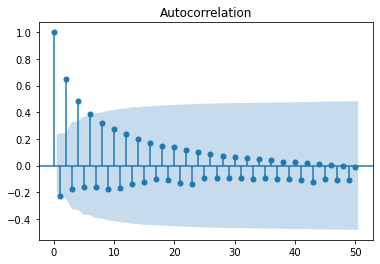

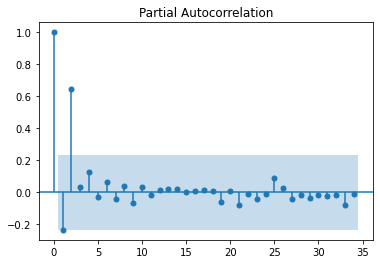

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

date_fx_log_diff = date_fx_log_diff.values.reshape(-1)

plot_acf(date_fx_log_diff, lags=50)
plot_pacf(date_fx_log_diff, lags=34)

plt.show()

In [74]:
from statsmodels.tsa.arima_model import ARIMA

y = date_fx_log.iloc[:,1]

# (p,d,q) = (3,1,2)
model_arima = ARIMA(y, (3,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D.FX   No. Observations:                   35
Model:                 ARIMA(3, 1, 2)   Log Likelihood                  98.613
Method:                       css-mle   S.D. of innovations              0.014
Date:                Fri, 08 Oct 2021   AIC                           -183.227
Time:                        21:30:38   BIC                           -172.339
Sample:                             1   HQIC                          -179.469
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.003      0.909      0.363      -0.003       0.007
ar.L1.D.FX     1.3808      0.204      6.762      0.000       0.981       1.781
ar.L2.D.FX    -1.2038      0.209     -5.755      0.0

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning

In [75]:
# (p,d,q) = (2,1,2)
model_arima = ARIMA(y, (2,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D.FX   No. Observations:                   35
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  97.548
Method:                       css-mle   S.D. of innovations              0.015
Date:                Fri, 08 Oct 2021   AIC                           -183.096
Time:                        21:31:13   BIC                           -173.764
Sample:                             1   HQIC                          -179.875
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.001      2.146      0.032       0.000       0.006
ar.L1.D.FX     0.2524      0.243      1.037      0.300      -0.224       0.729
ar.L2.D.FX     0.5284      0.238      2.218      0.0

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [76]:
#(p, d, q) = (1,1,1)
model_arima = ARIMA(y, (1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D.FX   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  96.946
Method:                       css-mle   S.D. of innovations              0.015
Date:                Fri, 08 Oct 2021   AIC                           -185.892
Time:                        21:31:47   BIC                           -179.671
Sample:                             1   HQIC                          -183.744
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.003      0.780      0.435      -0.003       0.008
ar.L1.D.FX    -0.6433      0.228     -2.827      0.005      -1.089      -0.197
ma.L1.D.FX     0.8702      0.138      6.304      0.0

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [77]:
#Using a for loop to find the best combination of (p, d, q) for ARIMA

import itertools

p = range(1, 4)
d = range(1, 2)
q = range(1, 3)

pdq = list(itertools.product(p, d, q))

aics = []
params = []

for param in pdq:
    model = ARIMA(y, order=param)
    model_fit = model.fit()
    aic = model_fit.aic
    aics.append(aic)
    params.append(param)

combo = list(zip(aics, params))
combo.sort()

combo_array = np.array(combo)
print(combo_array)

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIM

[[-185.89207442289486 (1, 1, 1)]
 [-184.126483719457 (1, 1, 2)]
 [-183.80604420345972 (2, 1, 1)]
 [-183.22690501791945 (3, 1, 2)]
 [-183.09646492995083 (2, 1, 2)]
 [-182.18614418891426 (3, 1, 1)]]


C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning

In [78]:
#(p, d, q) = (1,1,1)
model_arima = ARIMA(y, (1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.FX   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  96.946
Method:                       css-mle   S.D. of innovations              0.015
Date:                Fri, 08 Oct 2021   AIC                           -185.892
Time:                        21:35:30   BIC                           -179.671
Sample:                             1   HQIC                          -183.744
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.003      0.780      0.435      -0.003       0.008
ar.L1.D.FX    -0.6433      0.228     -2.827      0.005      -1.089      -0.197
ma.L1.D.FX     0.8702      0.138      6.304      0.0

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

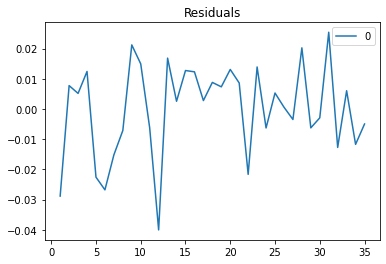

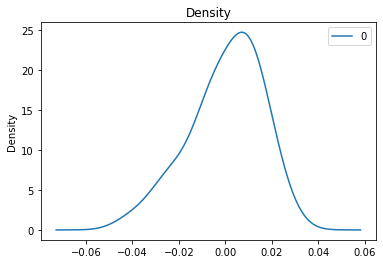

In [79]:
residuals = pd.DataFrame(model_arima_fit.resid)

residuals.plot(title='Residuals')
residuals.plot(kind='kde', title='Density')

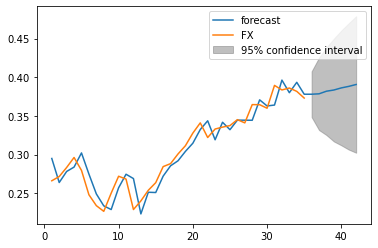

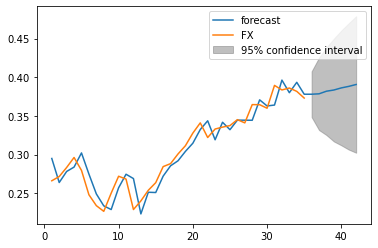

In [80]:
# forecasting the 12 months data 0f 2020
pred = model_arima_fit.forecast(12, alpha=0.05)[0]
model_arima_fit.plot_predict(1,42)

In [81]:
# Future month-year i.e of 2020
month_year_future = [x+1 for x in range(0,12)]
month_year_future = ['2020-0' + str(x) for x in month_year_future]
print(month_year_future)

['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-010', '2020-011', '2020-012']


In [82]:
# Future Date of 2020
Date = range(1, 37)
Date = np.array(Date).reshape(-1,1)

Date_future = range(36, 49)
Date_future = np.array(Date_future).reshape(-1,1)

In [83]:
pred_month = np.array(list(zip(month_year_future, pred)))
print(pred_month)

[['2020-01' '0.37800005628066685']
 ['2020-02' '0.3785236788640037']
 ['2020-03' '0.38190548390163237']
 ['2020-04' '0.3834484932279917']
 ['2020-05' '0.38617448150053596']
 ['2020-06' '0.38813940687819737']
 ['2020-07' '0.3905939578166817']
 ['2020-08' '0.39273351088649705']
 ['2020-09' '0.3950757160750033']
 ['2020-010' '0.39728754615531137']
 ['2020-011' '0.39958325233298025']
 ['2020-012' '0.4018249972920875']]


In [84]:
pred = np.exp(pred)
forecast = pred.tolist()

fx_2020 = np.array(list(zip(month_year_future, forecast)))
print(fx_2020)

[['2020-01' '1.4593630250097185']
 ['2020-02' '1.4601273805463464']
 ['2020-03' '1.4650736055477702']
 ['2020-04' '1.4673359727629212']
 ['2020-05' '1.4713413702695242']
 ['2020-06' '1.4742352885027568']
 ['2020-07' '1.4778583187508372']
 ['2020-08' '1.4810236600538285']
 ['2020-09' '1.4844965869206859']
 ['2020-010' '1.4877836750258366']
 ['2020-011' '1.4912031127099572']
 ['2020-012' '1.4945497595336779']]


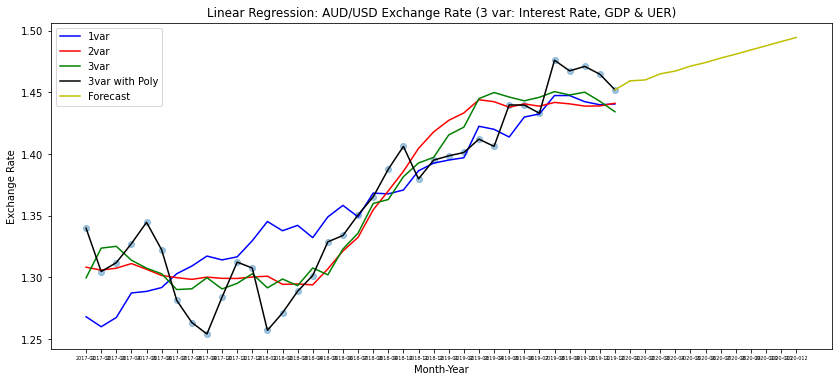

In [85]:
# Visualizing the whole from 2017 to 2020
x_merge = ['2019-12', '2020-01']
y_merge = [y_pred[-1], forecast[0]]

plt.figure(figsize=(14,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.plot(month_year, y_pred, color='black')
plt.plot(x_merge, y_merge, color='y')
plt.plot(month_year_future, forecast, color='y')
plt.legend(['1var', '2var', '3var', '3var with Poly', 'Forecast'])
plt.title("Linear Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()
